# Data Import

In [1]:
#Data Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objects as go
#Load dataset
df =pd.read_csv('mer_imputed_merged_data.csv')
df.head()

,datetime,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex
0,2020-11-25 01:00:00,0,35.0,72.0,8.0,1.0,47.0,1.8,44.0,15.6,256.0,0.5,0,0,4
1,2020-11-25 02:00:00,0,43.0,73.0,7.0,1.0,43.0,1.3,47.0,15.0,296.0,0.7,0,0,4
2,2020-11-25 03:00:00,0,37.0,60.0,6.0,1.0,39.0,0.9,49.0,14.4,302.0,0.5,0,0,4
3,2020-11-25 04:00:00,0,34.0,51.0,4.0,1.0,37.0,0.4,51.0,13.6,320.0,0.7,0,0,4
4,2020-11-25 05:00:00,0,28.0,59.0,5.0,1.0,40.0,0.7,56.0,12.6,90.0,1.2,0,0,4


## *Note:- 
- The dataset does not explicitly specify the units of measurement for variables like Ozone, PM2.5, PM10, and others. However, as per the guidelines, specific units and thresholds are recommended for consistent interpretation and reporting: 
Example for Ozone:
The guidelines suggest reporting Ozone levels in ppm and significant decimal figures which is 3 for O3, with thresholds such as:

- Good: < 0.058 ppm
- Acceptable: > 0.058 to 0.090 ppm

However, in this dataset, the descriptive statistics indicate values like:

- Mean: 25.62
- Median: 16.0
- IQR: Q1 = 4.0, Q3 = 40.0

These do not align with the guideline thresholds, indicating that the values are likely in a different unit.

- So, we will have to verify the measurement units from the dataset source or documentation.
- If required, convert the values to match guideline standards (e.g., µg/m³, ppm, etc.).
- Ensure all values are reported with significant figures as per guidelines (e.g., three decimal places for gases like Ozone).
This step is critical for accurate interpretation, comparison, and adherence to air quality standards.

# 2. Understanding the data 

In [2]:
#To understand the structure of the dataset and variables available for analysis
print(df.columns)

Index(['datetime', 'direct_radiation (W/m²)', 'PM25_MER', 'PM10_MER',
       'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER', 'RH_MER', 'TMP_MER',
       'WDR_MER', 'WSP_MER', 'is_festival', 'is_weekend', 'AirQualityIndex'],
      dtype='object')


In [3]:
#To identify how many missing (null/NaN) values exist in each column of the dataset
print(df.isnull().sum())

datetime                   0
direct_radiation (W/m²)    0
PM25_MER                   0
PM10_MER                   0
SO2_MER                    0
O3_MER                     0
NO2_MER                    0
CO_MER                     0
RH_MER                     0
TMP_MER                    0
WDR_MER                    0
WSP_MER                    0
is_festival                0
is_weekend                 0
AirQualityIndex            0
dtype: int64


In [4]:
#To check data types of the columns
print(df.dtypes)

datetime                    object
direct_radiation (W/m²)      int64
PM25_MER                   float64
PM10_MER                   float64
SO2_MER                    float64
O3_MER                     float64
NO2_MER                    float64
CO_MER                     float64
RH_MER                     float64
TMP_MER                    float64
WDR_MER                    float64
WSP_MER                    float64
is_festival                  int64
is_weekend                   int64
AirQualityIndex              int64
dtype: object


# 3. Univariate Analysis
- Univariate analysis is a type of data analysis that focuses on examining one variable at a time. The goal is to summarize and understand the key characteristics of that variable. 
- In this analysis, we will focus on individual variables to understand their distribution and central tendencies. We aim to uncover patterns, identify potential outliers, and summarize the key characteristics of each variable. 

### Numerical Columns
- We will first explore the numerical variables to analyze their distribution, central tendencies, and variability, which includes all columns except the 'datetime' column.

#### Statistical Summary

In [16]:
#To calculate and display key statistical metrics/summary for columns in the dataset
summary = df.describe()
print(summary)

       direct_radiation (W/m²)      PM25_MER      PM10_MER       SO2_MER  \
count             26788.000000  26788.000000  26788.000000  26788.000000   
mean                198.299313     21.938476     39.138806      3.653750   
std                 285.059521     12.670387     20.382502      5.767726   
min                   0.000000      1.000000      2.000000      0.000000   
25%                   0.000000     13.000000     24.000000      1.000000   
50%                   2.000000     20.000000     36.000000      2.000000   
75%                 383.000000     29.000000     51.000000      4.000000   
max                1008.000000    186.000000    411.000000    251.000000   

             O3_MER       NO2_MER        CO_MER        RH_MER       TMP_MER  \
count  26788.000000  26788.000000  26788.000000  26788.000000  26788.000000   
mean      25.629505     30.601047      0.505975     49.909788     18.849627   
std       26.409113     13.298383      0.382489     19.936643      4.285339   

#### Visualizations for Numerical Data

##### 1. Histogram
- A histogram is a graphical representation of the distribution of a dataset. It displays the frequency (or count) of data points within specific intervals, called bins

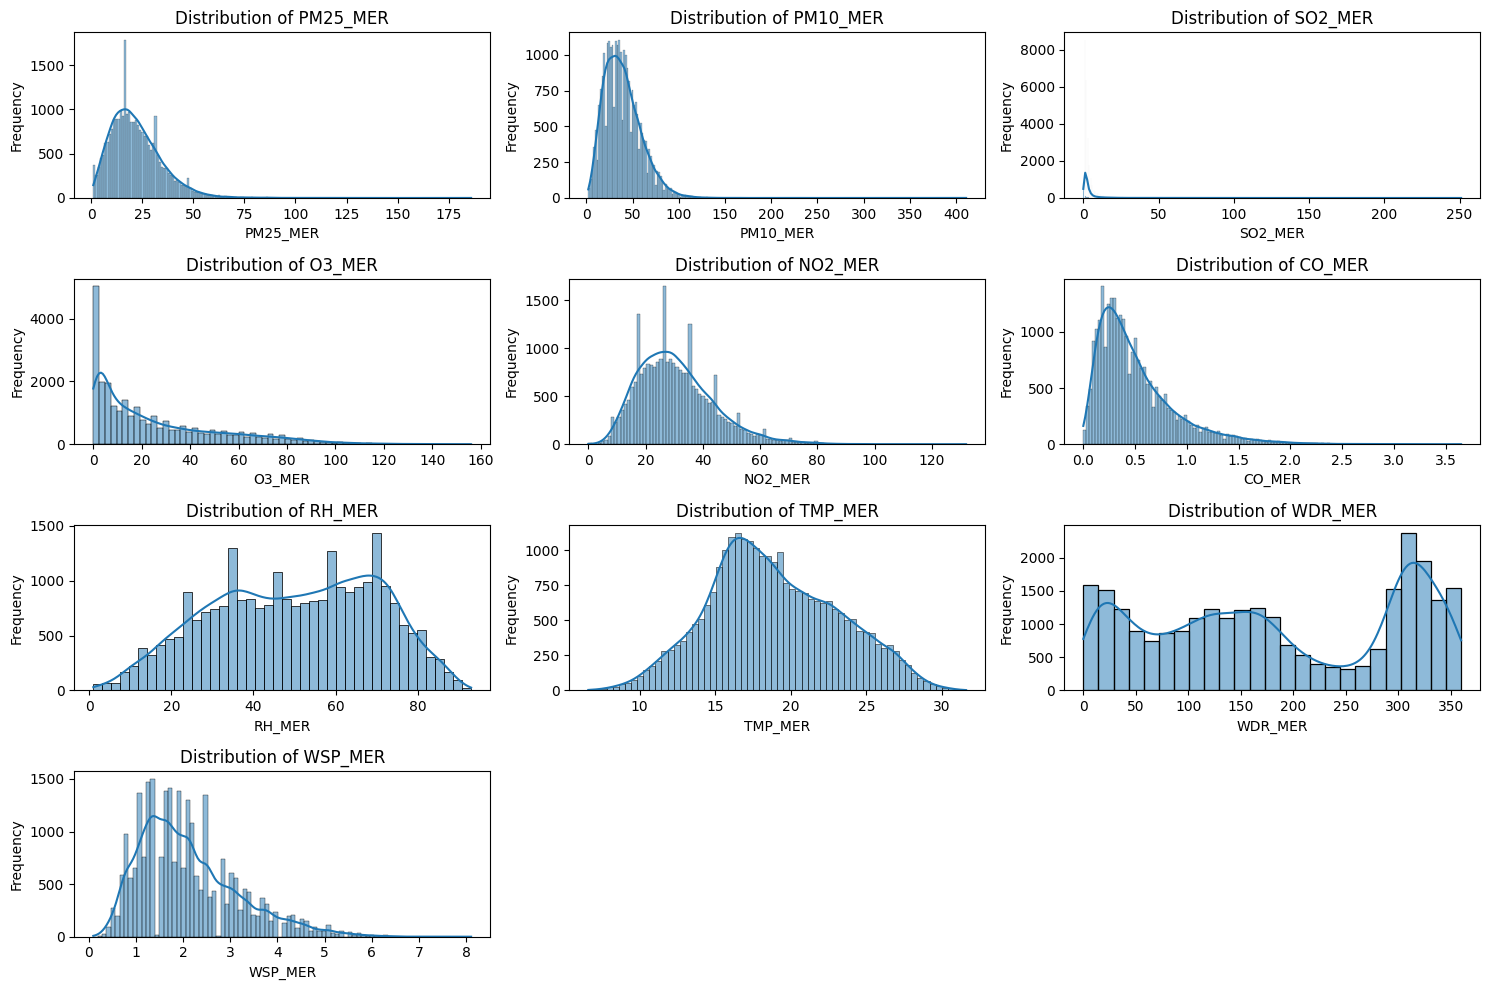

In [17]:
# Select pollutant and meteorological columns for the histogram
pollutant_columns = ['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']
meteorological_columns = ['RH_MER', 'TMP_MER', 'WDR_MER', 'WSP_MER']
columns_to_plot = pollutant_columns + meteorological_columns

# Create the histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)  # Adjust the subplot grid as needed
    sns.histplot(df[col], kde=True)  # Use kde=True for density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 2. Box Plots
- A boxplot (or box-and-whisker plot) is a graphical representation that displays the distribution of a dataset based on five key summary statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It also highlights potential outliers as points outside the "whiskers."

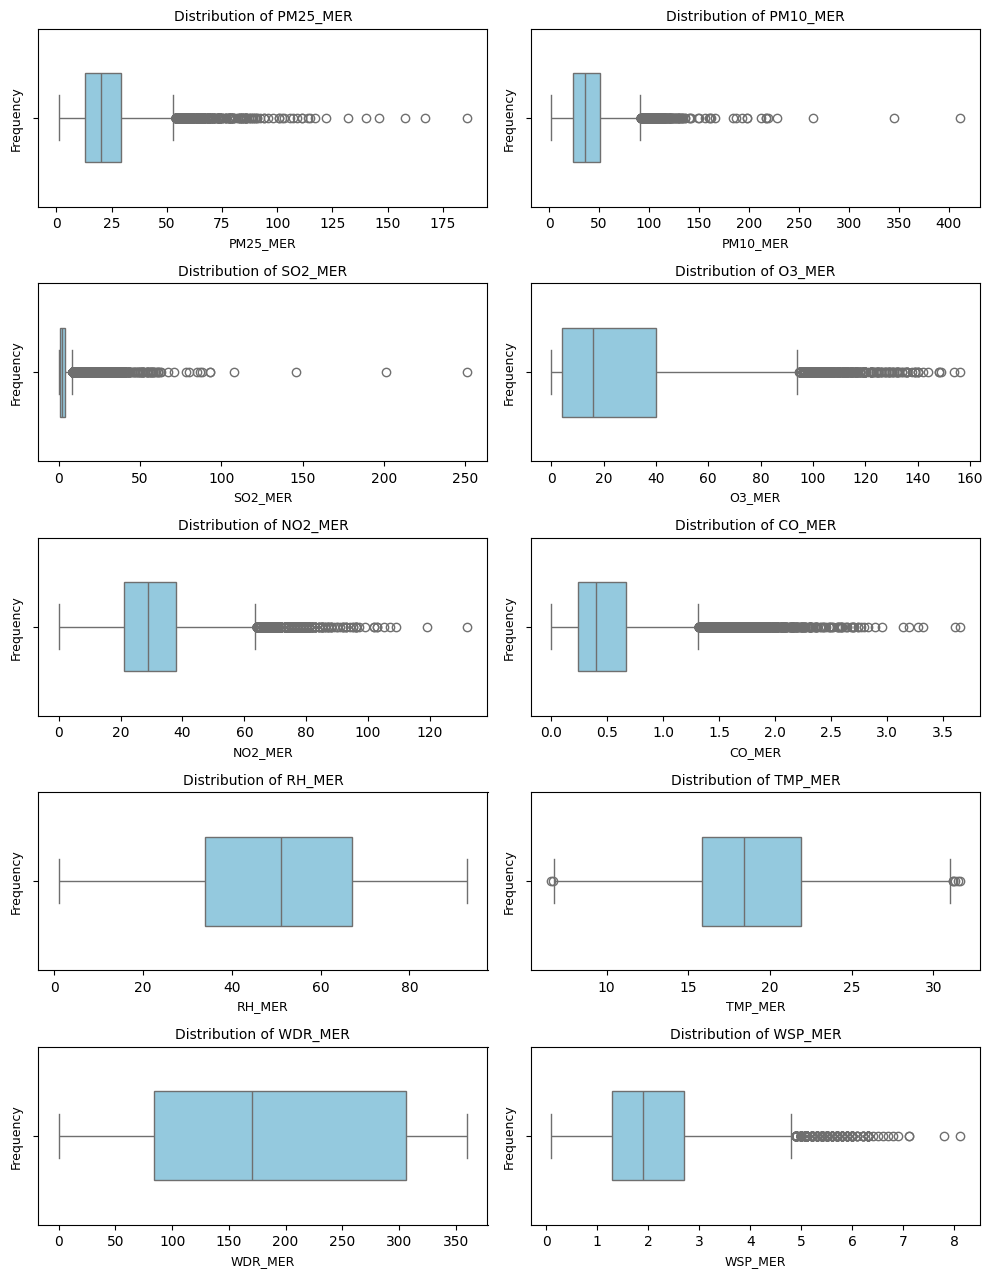

In [18]:
fig, axes = plt.subplots(6, 2, figsize=(10, 15))  # 4 rows, 3 columns grid
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(columns_to_plot):
 #Set up the figure and axes

    sns.boxplot(x=df[col], ax=axes[i],color='skyblue', width=0.5)
    # Add title and labels
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Frequency', fontsize=9)
    
# Remove any empty subplots (if columns_to_plot is fewer than grid spaces)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
# Show the plot
plt.tight_layout()
plt.show()


#### Descriptive Statistics

In [19]:
# Loop through each column and calculate the statistics
for col in columns_to_plot:
    # Mean
    mean = df[col].mean()

    # Median
    median = df[col].median()
    
    # First Quartile (Q1)
    q1 = df[col].quantile(0.25)
    
    # Third Quartile (Q3)
    q3 = df[col].quantile(0.75)
    
    # Interquartile Range (IQR)
    iqr = q3 - q1
    
    # Outlier thresholds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Print results for the current column
    print(f"\nColumn: {col}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1 (25th Percentile): {q1}")
    print(f"Q3 (75th Percentile): {q3}")
    print(f"IQR: {iqr}")
    print(f"Outlier Range: Below {lower_bound} or Above {upper_bound}")



Column: PM25_MER
Mean: 21.938475638967788
Median: 20.0
Q1 (25th Percentile): 13.0
Q3 (75th Percentile): 29.0
IQR: 16.0
Outlier Range: Below -11.0 or Above 53.0

Column: PM10_MER
Mean: 39.13880632186875
Median: 36.0
Q1 (25th Percentile): 24.0
Q3 (75th Percentile): 51.0
IQR: 27.0
Outlier Range: Below -16.5 or Above 91.5

Column: SO2_MER
Mean: 3.6537500466623376
Median: 2.0
Q1 (25th Percentile): 1.0
Q3 (75th Percentile): 4.0
IQR: 3.0
Outlier Range: Below -3.5 or Above 8.5

Column: O3_MER
Mean: 25.629504504500723
Median: 16.0
Q1 (25th Percentile): 4.0
Q3 (75th Percentile): 40.0
IQR: 36.0
Outlier Range: Below -50.0 or Above 94.0

Column: NO2_MER
Mean: 30.6010472661865
Median: 29.0
Q1 (25th Percentile): 21.0
Q3 (75th Percentile): 38.0
IQR: 17.0
Outlier Range: Below -4.5 or Above 63.5

Column: CO_MER
Mean: 0.5059746201659231
Median: 0.4
Q1 (25th Percentile): 0.24
Q3 (75th Percentile): 0.67
IQR: 0.43000000000000005
Outlier Range: Below -0.405 or Above 1.315

Column: RH_MER
Mean: 49.9097878092

**3. Violin Plots**
- A violin plot is used to visualize the distribution and density of each variable, highlighting the shape of the data's distribution and potential multi-modality.


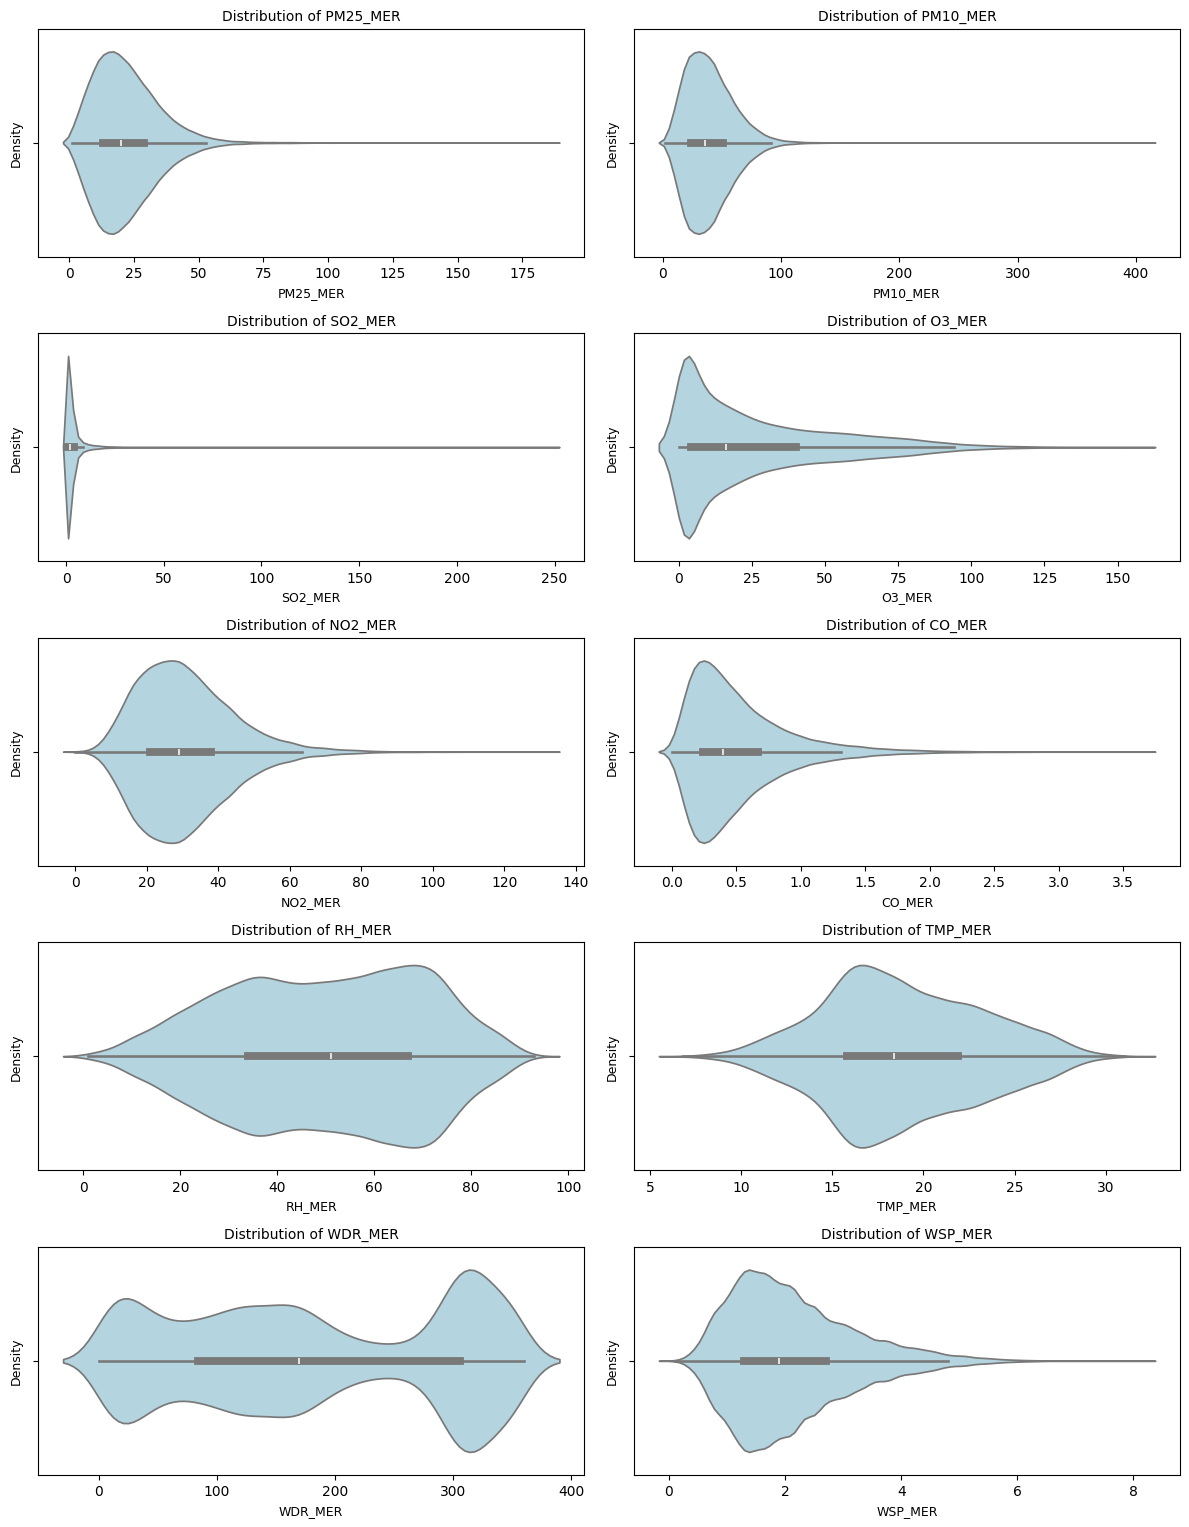

In [20]:
fig, axes = plt.subplots(6, 2, figsize=(12, 18))  # 6 rows, 2 columns grid
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each column and corresponding subplot
for i, col in enumerate(columns_to_plot):
    sns.violinplot(x=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Density', fontsize=9)

# Remove any unused subplots if the number of columns is less than grid spaces
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


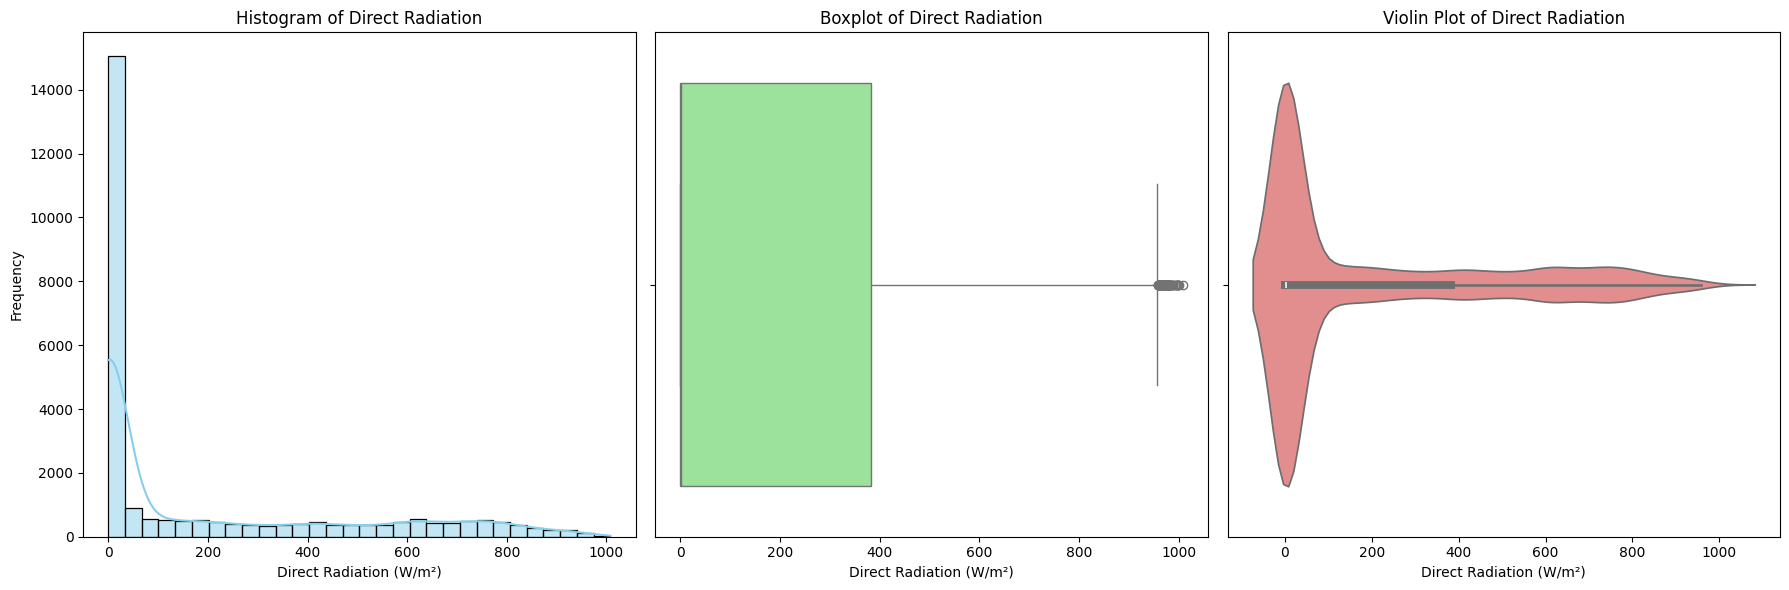

In [21]:
#direct_radiation (W/m²)
#  Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Histogram
sns.histplot(
    data=df,
    x='direct_radiation (W/m²)',
    kde=True,  # Add Kernel Density Estimate (KDE) line
    bins=30,  # Number of bins
    color='skyblue',
    ax=axes[0]
)
axes[0].set_title('Histogram of Direct Radiation', fontsize=12)
axes[0].set_xlabel('Direct Radiation (W/m²)', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)

# Boxplot
sns.boxplot(
    data=df,
    x='direct_radiation (W/m²)',
    color='lightgreen',
    ax=axes[1]
)
axes[1].set_title('Boxplot of Direct Radiation', fontsize=12)
axes[1].set_xlabel('Direct Radiation (W/m²)', fontsize=10)

# Violin Plot
sns.violinplot(
    data=df,
    x='direct_radiation (W/m²)',
    color='lightcoral',
    ax=axes[2]
)
axes[2].set_title('Violin Plot of Direct Radiation', fontsize=12)
axes[2].set_xlabel('Direct Radiation (W/m²)', fontsize=10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Boolean and Categorical Columns
- We will now explore the categorical and boolean variables to analyze their frequency distribution, class balance, and unique value counts. 

**1. Bar Plots**
- A bar plot is used to summarize the statistics of the air quality metrics, providing a clear and direct comparison between different variables.


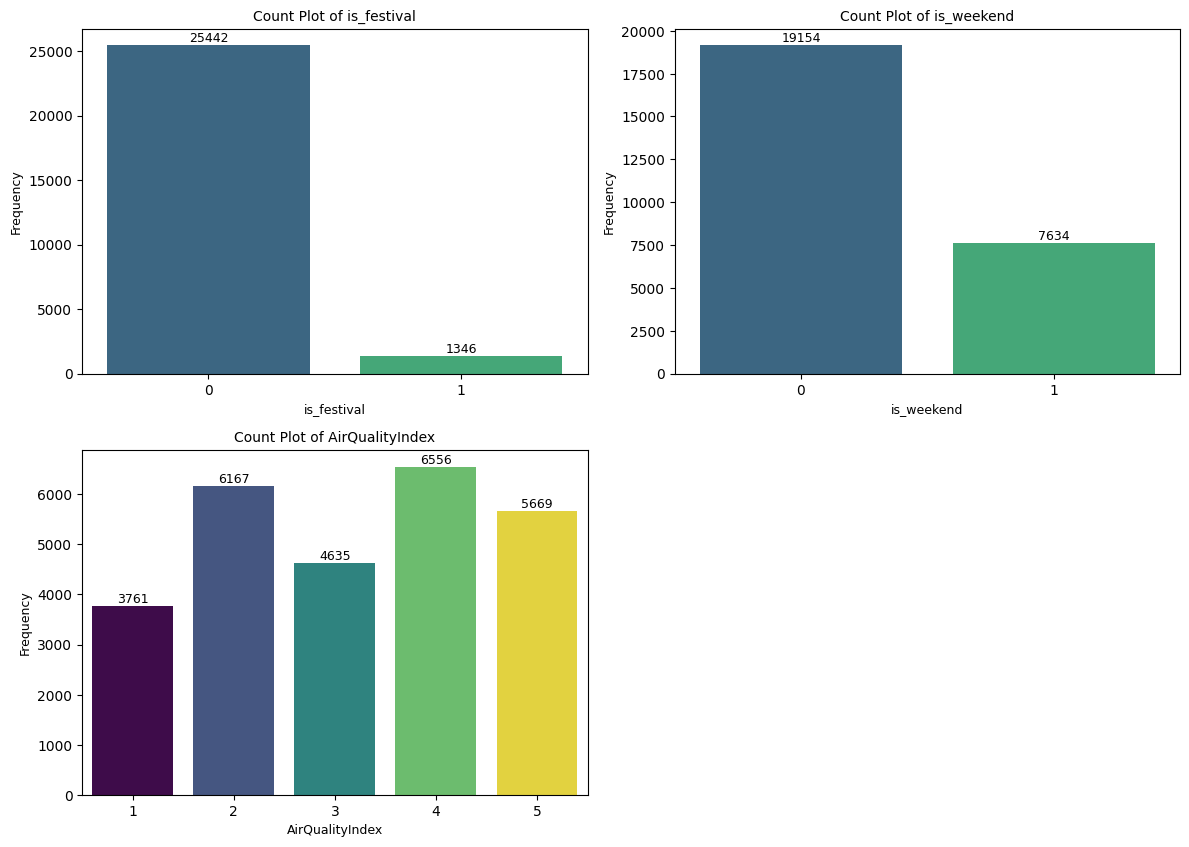

In [22]:

# Set up a figure with subplots
fig, axes = plt.subplots(6, 2, figsize=(12, 25))  # 6 rows, 2 columns grid
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# List of categorical columns to plot
cat_columns = ['is_festival', 'is_weekend', 'AirQualityIndex']

# Loop through each column and corresponding subplot
for i, col in enumerate(cat_columns):
    # Create the count plot
    sns.countplot(
        x=col,
        data=df,  # Use the dataset directly
        ax=axes[i],
        hue=col,  # Assign the same column to hue for color mapping
        palette="viridis",  # Color palette
        dodge=False,  # Ensures the bars are not split
        legend=False  # Suppress the legend
    )
    
    # Set plot titles and labels
    axes[i].set_title(f'Count Plot of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Frequency', fontsize=9)
    
    # Optionally, add labels on top of the bars to show the counts
    for p in axes[i].patches:
        axes[i].annotate(
            format(p.get_height(), '.0f'),  # Format the count as integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the label
            ha='center', va='center',  # Alignment
            fontsize=9, color='black',  # Label font size and color
            xytext=(0, 5), textcoords='offset points'  # Positioning the label slightly above the bar
        )

# Remove any unused subplots if the number of columns is less than grid spaces
for j in range(len(cat_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Key Observations and Analysis

#### **1. PM25_MER (Particulate Matter 2.5)**

**Distribution and Skewness:**
- The data is right-skewed, with most values clustered in the lower range (10-30).
- There are occasional outliers that extend up to 175, indicating rare but significant spikes in pollution.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 21.93.
- Median: Calculated as 20, representing the central tendency of PM2.5 concentrations.
- Interquartile Range (IQR): Covering the middle 50% of the data based on the plots and calculated as:
    Q1 (25th Percentile): 13.0
    Q3 (75th Percentile): 29.0
    IQR: 16.0

**Range and Outliers:**
- Normal Range: Most values fall between 10 and 30, with occasional values extending up to 50. A long tail reaches up to 175.
- Outliers: Outliers appear above 53.0, with occasional spikes up to 175, indicating significant pollution events caused by industrial activities, traffic emissions, or weather conditions that trap pollutants. (The lower outlier range (below -11.0) is removed since it is irrelevant and is not physically possible) 

**Visual Insights:**
- Histogram: Shows most data concentrated in the lower range, with a long tail toward higher values.
- Violin Plot: The violin plot confirms a sharp density peak around the median (20), with a long tail extending toward higher values, showing the right-skewed distribution.
- Box Plot: Illustrates a wide range of typical values and emphasizes the presence of high outliers.

**Environmental and Health Implications:**
- Moderate Levels (10-30): Manageable air quality but sustained exposure to moderate PM2.5 levels can be risky for vulnerable groups such as children, the elderly, and individuals with pre-existing respiratory conditions. 
- High Levels (>50): It can cause significant health risks during pollution events, requiring to address the pollution sources that can likely be the vehicle emissions or industrial activities.

**Overall Interpretation:**
- The data reflects moderate PM2.5 levels at normal conditions, with infrequent but impactful spikes in pollution. These findings highlight the need for monitoring and addressing the causes of elevated PM2.5 during high-pollution events.



#### **2. PM10_MER (Particulate Matter 10)**

**Distribution and Skewness:**
- The data is right-skewed, with most values concentrated in the lower range (30-50).
- The occasional extreme values extend up to 400, indicating rare but significant pollution episodes.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 39.13.
- Median: Calculated as 36.0, representing the central tendency of PM10 concentrations.
- Interquartile Range (IQR): Calculated as:
    Q1 (25th Percentile): 24.0
    Q3 (75th Percentile): 51.0
    IQR: 27.0

**Range and Outliers:**
- Normal Range: Most values fall within 10-90, indicating generally moderate pollution levels.
- Outliers: Appear above 91.5, with extreme values reaching up to 400, suggesting ocassional pollution events likely caused by industrial emissions, construction dust, or vehicle exhaust. (The lower outlier range (below -16.5) is removed since it is irrelevant and is not physically possible) 

**Visual Insights:**
- Histogram: Shows a peak frequency around 30-50 with a long tail extending to higher values.
- Violin Plot: Confirms a sharp density peak between 20-50 and highlights the long tail of extreme values.
- Box Plot: Emphasizes the typical range (10-90) and the presence of significant outliers.

**Comparison to PM2.5:**
- PM10 exhibits a larger range and more frequent extreme values than PM2.5, as expected due to the larger size of PM10 particles and their greater variability.

**Environmental and Health Implications:**
- Moderate Levels (10-60): Represent manageable air quality but can still pose risks to sensitive groups.
- High Levels (>100): Pose serious health risks, especially during prolonged exposure. These levels likely result from localized or seasonal pollution events and require targeted interventions.

**Overall Interpretation:**
- The data reflects frequent moderate pollution levels centered around 30-50, with occasional severe pollution events extending up to 400.
- The right-skewed distribution and long tail emphasize the need for monitoring and addressing high-concentration events, which could be driven possibly by industrial emissions, construction dust, or vehicle traffic.

#### **3. O3_MER (Ozone)**

**Distribution and Skewness:**
- The data is right-skewed, with most values concentrated in the lower range (0-50).
- A long tail extends up to 160, indicating occasional elevated ozone levels caused by specific environmental or meteorological conditions.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 25.62.
- Median: Calculated as 16.0.
- Interquartile Range (IQR): The IQR is calculated as:
    Q1 (25th Percentile): 4.0
    Q3 (75th Percentile): 40.0
    IQR: 36.0

***Range and Outliers:**
- Normal Range: The values range from 0 to 160, with a gradual decline in frequency as the values increase. Most ozone concentrations are between between 0–80.
- Outliers: Values above 94.0 are considered outliers, extending up to 160, representing sporadic high ozone events due to photochemical reactions in urban or industrial areas. The outlier range below -50.0 is irrelevant since ozone cannot have negative values.

**Visual Insights:**
- Histogram: Highlights a peak near 0-10, with a gradual decline in frequency as ozone levels increase.
- Violin Plot: Shows a sharp density at the lower end and a long tail extending to 160, confirming the skewed distribution and presence of high outliers.
- Box Plot: Illustrates the typical range (4–40) and emphasizes the outliers beyond 94.0.

**Comparison to Other Pollutants:**
- Ozone exhibits a broader range of typical values compared to SO2 or PM2.5, reflecting its dependence on photochemical activity rather than direct emissions.
- Similar to SO2, O3 exhibits significant outliers, though its median and typical range are higher.

**Environmental and Health Implications:**
- Moderate Levels (4–40): These levels are common in urban and suburban environments and generally pose minimal risks to the general population but can affect sensitive groups with respiratory conditions.
- High Levels (>94): Elevated ozone levels contribute to smog formation and can negatively impact respiratory health, particularly during prolonged exposure.

**Overall Interpretation:**
- The data reflects moderate ozone levels as typical, with a median of 16.0 and an IQR of 36.0.
- The long tail and outliers up to 160 highlight occasional elevated ozone levels, driven by photochemical reactions involving sunlight and emissions.
- These elevated levels underscore the need for monitoring and mitigating ozone pollution during hot or sunny conditions to protect public health and the environment.

#### **4. SO2_MER (Sulfur Dioxide)**

**Distribution and Skewness:**
- The data is heavily right-skewed, with most values concentrated near 0, most SO2 levels are minimal or negligible, reflecting very low sulfur dioxide pollution under normal conditions.
- A long tail extends up to 250, indicating rare but significant spikes in sulfur dioxide concentrations.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 3.65.
- Median: The median is calculated as 2.0, representing the central tendency of SO2 concentrations.
- Interquartile Range (IQR): Calculated as:
    Q1 (25th Percentile): 1.0
    Q3 (75th Percentile): 4.0
    IQR: 3.0

**Range and Outliers:**
- Normal Range: Most values lie within 0-8.5, reflecting low SO2 levels under normal conditions.
- Outliers: The calculated outliers are values above 8.5. The lower bound of -3.5 is irrelevant, as SO2 cannot have negative values.

**Visual Insights:**
- Histogram: Shows a sharp peak near 0 with a long right tail extending to extreme values.
- Violin Plot: Confirms the clustering of values near 0, with a few extreme outliers stretching up to 250.
- Box Plot: Highlights the narrow typical range (0-8.5) and the presence of numerous outliers.

**Comparison to Other Pollutants:**
- SO2 concentrations are much lower than those of PM2.5 or PM10, as indicated by its lower median and IQR.
- Similar to PM2.5 and PM10, SO2 exhibits episodic extreme values, though these are less frequent.

**Environmental and Health Implications:**
- Moderate Levels (0-8.5): Typically not concerning, but even low levels can cause irritation for individuals with asthma or respiratory conditions.
- High Levels (>100): Pose serious health risks, including respiratory irritation and the potential for acid rain formation. These extreme events may need further investigations to know the source of occasional hight level S02.

**Overall Interpretation:**
- The data reflects minimal typical SO2 pollution, with most values clustered near 0.
- However, sporadic extreme events extend up to 250, driven by specific pollution sources like industrial emissions or combustion of sulfur-containing fuels.
- The heavily right-skewed distribution highlights the need for monitoring and addressing these occasional high-emission events to minimize health and environmental impacts.





#### **5. NO2_MER (Nitrogen Dioxide)**

**Distribution and Skewness:**
- The data is moderately right-skewed, with most values concentrated in the lower range (20-40).
- A long tail extends up to 120, indicating sporadic spikes in nitrogen dioxide levels due to specific pollution events.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 30.60.
- Median: Calculated as 29.0, representing the central tendency of NO2 concentrations. While visually interpreted as closer to 40, the skewness in the data explains the calculated lower value.
- Interquartile Range (IQR): Calculated as following and indicating that the middle 50% of values are distributed within this range:
    Q1 (25th Percentile): 21.0
    Q3 (75th Percentile): 38.0
    IQR: 17.0

**Range and Outliers:**
- Normal Range: Most values fall between 0–60, with the highest frequency around 20–30, as shown in the histogram.
- Outliers: Outliers begin above 63.5 and extend up to 120, representing episodic high concentrations, possibly caused by traffic or industrial emissions.
The lower bound (-4.5) is not relevant and has been excluded.

**Visual Insights:**
- Histogram: Shows a peak around 20-30, with a steady decline in frequency as NO2 levels increase.
- Violin Plot: Confirms the density is highest between 20-40 and highlights the tail of elevated concentrations.
- Box Plot: Illustrates the typical range (0-60) and emphasizes the outliers beyond 63.5.

**Comparison to Other Pollutants:**
- Compared to PM10_MER or O3_MER, NO2_MER has a narrower range but exhibits significant outliers.
- Unlike O3, which is driven by photochemical reactions, NO2 concentrations are more directly tied to urban traffic and industrial sources.

**Environmental and Health Implications:**
- Moderate Levels (20-50): These levels are typical in urban environments and may pose moderate health risks for sensitive groups such as children, the elderly, and individuals with respiratory conditions.
- High Levels (>63.5): Elevated NO2 levels can contribute to respiratory problems and reduced air quality.
These spikes, often linked to heavy traffic or industrial activity, highlight the need for targeted emission control measures and prolonged exposure to high NO2 levels is also associated with the formation of secondary pollutants like ozone and particulate matter

**Overall Interpretation:**
- The data reflects moderate NO2 levels, with a median of 29.0 and an IQR of 21.0-38.0.
- The long tail and outliers up to 120 indicate episodic high NO2 levels, likely tied to urban pollution sources such as traffic congestion or industrial emissions.
- The findings underscore the importance of monitoring and mitigating NO2 emissions to improve air quality and minimize health impacts, especially during high-emission events.

#### **6. CO_MER (Carbon Monoxide)**

**Distribution and Skewness:**
- The data is right-skewed, with most values concentrated in the lower range (0.3-0.5).
- A long tail extends up to 3.5, indicating occasional spikes in carbon monoxide levels.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 0.50.
- Median: Calculated as 0.4 reflecting low baseline carbon monoxide concentrations based on plots. 
- Interquartile Range (IQR):Calculated as following, showing that most values are tightly distributed in a narrow range:
    QQ1 (25th Percentile): 0.24
    Q3 (75th Percentile): 0.67
    IQR: 0.43


**Range and Outliers:**
- Normal Range: Most CO levels fall between 0.0-1.0, indicating consistently low carbon monoxide levels under typical conditions.
- Outliers: Outliers appear above 1.31 and extend up to 3.5, suggesting sporadic high CO levels likely caused by localized emission events such as vehicle congestion or industrial activity. Outliers "below -0.405" do not occur in practice as CO levels cannot be negative.


**Visual Insights:**
- Histogram: Highlights a peak frequency around 0.3-0.5, with a sharp decline in frequency at higher levels.
- Violin Plot: Confirms the clustering of values near 0.3, consistent with the histogram, and shows a long tail representing elevated concentrations.
- Box Plot: Emphasizes the narrow typical range (0.0-1.0) and outliers above 1.0.

**Comparison to Other Pollutants:**
- CO shows a narrower range and generally lower concentrations compared to NO2_MER or PM10_MER, reflecting its stable baseline levels.
- While CO has fewer outliers than particulate matter, occasional spikes still highlight the need for monitoring.

**Environmental and Health Implications:**
- Low Levels (0.0-1.0): These levels are safe under typical conditions and indicate good air quality.
However, even low levels of CO can accumulate in poorly ventilated indoor spaces, posing risks to vulnerable populations.
- High Levels (>1.0): Elevated CO levels, often caused by vehicle emissions or industrial activity, can negatively impact respiratory and cardiovascular health. These spikes are localized and require targeted interventions to mitigate their sources.

**Overall Interpretation:**
- The data reflects low baseline CO levels, with a calculated median of 0.4 and an IQR of 0.24-0.67.
- The long tail and outliers up to 3.5 suggest sporadic events of elevated carbon monoxide concentrations, likely tied to localized pollution sources such as traffic or industrial emissions.
- The findings emphasize the need for monitoring in high-emission areas to address occasional spikes and ensure air quality remains safe.


#### **7. RH_MER(Relative Humidity)**

**Distribution and Skewness:**
- The data shows a subtle bimodal distribution, with peaks around 40–50 and 60–70, reflecting varying atmospheric conditions.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 49.90.
- Median: Calculated as 51.0. Based on the visual representation approximately 50%, reflecting the central value of relative humidity.
- Interquartile Range (IQR): The middle 50% of relative humidity values lie between 34 and 67, suggesting moderate variability.
    Q1 (25th Percentile): 34.0
    Q3 (75th Percentile): 67.0
    IQR: 33.0

**Range and Key Observations:**
- Normal Range: Most values are concentrated between 40 and 70, reflecting typical atmospheric conditions.
- Full Range: Extends from 0 to 100, representing the complete spectrum of relative humidity.
- No Outliers: There are no visible outliers, indicating consistent and balanced relative humidity levels.
There are no visible outliers within the range of 0 to 100, as the calculated outlier thresholds are outside the physically possible humidity values that is below -15.5 or above 116.5.

**Visual Insights:**
- Histogram: Highlights multiple peaks, around 30, 50, and 70, likely indicating varying atmospheric conditions or seasonal changes.
- Violin Plot: Confirms a bimodal shape, with two density peaks and a slight left-skewness due to less frequent low humidity values.
- Box Plot: Emphasizes the stable typical range (40-60) and confirms the absence of significant outliers.

**Comparison to Other Variables:**
- Relative humidity exhibits a bimodal distribution, unlike the skewed patterns of pollutants like CO or NO2.
- Its broader range and lack of outliers suggest more environmental stability compared to pollutants.

**Environmental and Practical Implications:**
- Moderate Humidity Levels (40-70): The clustering in this range indicates stable atmospheric moisture, typical of many environments and conducive to consistent weather conditions.
- Low Humidity (Below 30): Less frequent and represented by the left tail, these values may correspond to dry periods or localized conditions, requiring monitoring in arid environments.
- High humidity levels (>70) are likely influenced by seasonal patterns, which may impact human comfort, increase the risk of mold growth, or affect agricultural productivity.
- Bimodal Behavior: Indicates distinct atmospheric conditions, possibly reflecting seasonal, regional, or weather-related variations.

**Overall Interpretation:**
- The data reflects moderate and stable relative humidity, with a median of 51.0 and an IQR of 34-67.
- The bimodal distribution highlights distinct atmospheric conditions, with typical clusters around 40-50 and 60-70.
- The absence of outliers suggests consistency, while the full range from 0-100 captures natural variability influenced by environmental and seasonal changes.
- These findings provide valuable insights into weather patterns and atmospheric moisture levels in the observed region.



#### **8. TMP_MER (Temperature)**

**Distribution and Symmetry:**
- The data follows a bell-shaped, unimodal distribution with slight deviations from perfect normality.
- Most temperatures are concentrated around 20, indicating this as the typical value.
- The distribution is symmetric, with balanced variability on both sides of the central value and no significant skewness.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 18.84
- Median: Calculated as 18.4, reflecting the central temperature value.
- Interquartile Range (IQR): The middle 50% of temperatures lie between 15.82 and 21.9, reflecting moderate variability.
    Q1 (25th Percentile): 15.82
    Q3 (75th Percentile): 21.9
    IQR: 6.07

**Range and Outliers:**
- Normal Range: Most temperatures fall within 10-30, indicating stable and moderate conditions.
- Extreme Values: A few outliers extend below 10 and above 30, representing rare weather extremes.
- Full Range: Temperatures range from 5 to 32, reflecting seasonal or regional variability.
Outlier Range: Below 6.72 or Above 31.00

**Visual Insights:**
- Histogram: Indicates a concentration of values around 20, tapering off symmetrically toward lower and higher temperatures.
- Violin Plot: Confirms the unimodal and symmetric distribution, with a density peak around 18-20.
- Box Plot: Highlights the typical range (15-25) and rare outliers beyond 10-30.

**Comparison to Other Variables:**
- TMP_MER exhibits a narrower range and more symmetric distribution compared to variables like RH_MER (Relative Humidity).
- Unlike pollutants such as CO or NO2, temperature shows natural variability without significant skewness or sharp peaks.

**Environmental and Practical Implications:**
- Moderate Temperatures (15–25): This range suggests a temperate climate or stable environmental conditions, suitable for human activities, agriculture, and energy efficiency.
- Extreme Temperatures (<10 or >30): Rare outliers indicate occasional cold or hot weather conditions, potentially requiring preparation for extreme events.
- Symmetry and Stability: The symmetric distribution and lack of extreme variability reflect consistent and predictable temperature patterns, typical of balanced climatic conditions.

**Overall Interpretation:**
- The data reflects mild and stable temperatures, with a median of 18.4 and an IQR of 15.82-21.9, indicating moderate variability.
- The symmetric, bell-shaped distribution suggests consistent climatic conditions, with rare outliers (<10 or >30) representing occasional extremes.
- These findings highlight a temperate climate, with balanced temperature fluctuations suitable for various environmental and human activities.


#### **9. WDR_MER (Wind Direction)**

**Distribution and Clustering:**
- The data is multi-modal, with wind directions clustering around specific angles.
- Prominent peaks are observed around 50-100, 150, and 250-300, suggesting dominant wind directions influenced by local geography, weather, or seasonal patterns.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 184.42
- Median: Calculated as 170.0.
- Interquartile Range (IQR): Calculated as following, showing that the middle 50% of values span a wide range of wind directions:
    Q1 (25th Percentile): 84.0
    Q3 (75th Percentile): 306.0
    IQR: 222.0

**Range and Uniformity:**
- Full Range: Wind directions span from 0 to 360, covering the complete spectrum of possible wind directions.
- No Outliers: The data shows no extreme values, as all observations fall within the expected range.
Outlier Range: Below -249.0 or Above 639.0 (These are out of range as values range from 0 to 360)

**Visual Insights:**
- Histogram: The data exhibits clear clustering of wind directions, with prominent peaks observed around 50–100 and 250–300 while a smaller peak appears near 150°.
- Violin Plot: Confirms the multi-modal distribution, with smooth tails and no sharp spikes, indicating balanced variability across all directions.
- Box Plot: Emphasizes the broad typical range (90-270) and the uniform spread of wind directions.

**Comparison to Other Variables:**
- Unlike variables like PM2.5 or NO2, wind direction shows a circular nature and multi-modal distribution, reflecting its inherent variability.
- Compared to TMP_MER or RH_MER, WDR_MER exhibits a much wider range due to the 0-360 scale.

**Environmental and Practical Implications:**
- Dominant Wind Directions:
The clustering around specific angles reflects prevailing wind patterns, which may be influenced by geographical or meteorological factors.
These patterns can be critical for urban planning, environmental impact assessments, and designing wind energy projects.
- Uniform Variability:
The symmetric and balanced distribution of wind directions indicates consistent patterns without extreme deviations, making predictions and modeling more reliable.
- Applications:
Wind direction data can inform air quality management, as it helps track the movement of pollutants.
Clusters of specific directions can indicate sources of emissions or transport pathways for particulate matter.

**Overall Interpretation:**
- The data reflects consistent and balanced wind patterns, with a median direction of 170 and an IQR of 84-306.
- The multi-modal distribution indicates distinct clusters around specific angles, highlighting prevailing wind directions that vary based on geography, weather, or seasonal factors.
- The findings provide valuable insights for applications like environmental monitoring, urban planning, and wind energy development, where understanding wind direction is crucial.


#### **10. WSP_MER (Wind Speed)**

**Distribution and Skewness:**
- The data is right-skewed, with most wind speeds concentrated in the lower range (0-2).
- A long tail extends up to 8, indicating occasional higher wind speeds caused by specific weather events.

**Descriptive Statistics and Central Tendency:**
- Mean: Calculated as 2.10
- Median: Calculated as 1.9. 
- Interquartile Range (IQR): The middle 50% of wind speeds are tightly clustered within the range of 1.3–2.7, reflecting limited variability.
    Q1 (25th Percentile): 1.3
    Q3 (75th Percentile): 2.7
    IQR: 1.400

**Range and Outliers:**
- Normal Range: Most wind speeds fall between 0-4, reflecting calm to moderate conditions.
- Outliers: Wind speeds above 4, extending up to 8, are outliers and represent infrequent but stronger wind events. The lower bound of -0.8 is irrelevant, as wind speeds cannot take negative values

**Visual Insights:**
- Histogram: The distribution has a single peak, with most wind speeds concentrated around 1-2 and gradually decreasing at higher values.
- Violin Plot: Confirms the clustering of values in the lower range and highlights the long tail of less frequent high wind speeds.
- Box Plot: Illustrates the narrow typical range (1.3–2.7) and the presence of outliers beyond 4.

**Comparison to Other Variables:**
- WSP_MER exhibits a narrower range and less variability compared to pollutants like PM2.5 or O3.
- Unlike WDR_MER (Wind Direction), which is multi-modal, WSP_MER shows a unimodal and right-skewed distribution, reflecting its natural variability.

**Environmental and Practical Implications:**
- Calm to Moderate Wind Speeds (0-2): These are typical in many environments and suggest stable atmospheric conditions suitable for air quality monitoring, agriculture, or general outdoor activities.
- Higher Wind Speeds (>4): Represent rare but significant wind events, which may have implications for wind energy projects, infrastructure planning, or safety measures during gusty weather.


**Overall Interpretation:**
- The data reflects generally calm to moderate wind speeds, with a median of 1.9 and an IQR of 1.3-2.7, indicating limited variability.
- The long tail and outliers up to 8 represent occasional strong winds, likely tied to specific weather phenomena or localized conditions.
- These findings underscore the stability of wind patterns while highlighting the need to account for sporadic high wind events in planning and forecasting.



#### **10.is_festival**

**Description:**
- The variable is_festival indicates whether a day is a festival day (1) or not (0).

**Observations:**
- Non-festival days (0) dominate the dataset, with 25,442 instances.
- Festival days (1) are much less frequent, with only 1,346 instances.
- Festival days constitute approximately 5% of the dataset, while non-festival days make up the remaining 95%.
- This imbalance highlights that most days in the dataset are regular, non-festival days.

**Insights:**
- The dataset has a highly imbalanced representation for is_festival.
- Such imbalance could impact analysis or modeling if this variable significantly influences outcomes.
- Special handling, such as resampling or weighting, may be necessary in models to avoid bias.

Overall Observations:
- The variable is highly imbalanced, with non-festival days vastly outnumbering festival days. This imbalance may require special handling during analysis or modeling.

#### **11.is_weekend**

**Description:**
- The variable is_weekend indicates whether a day is a weekend (1) or not (0).

**Observations:**
- Weekdays (0) are more frequent, with 19,154 instances.
- Weekends (1) account for 7,634 instances, making up about 28.5% of the dataset.

**Insights:**
- The variable is_weekend has a more balanced distribution compared to is_festival.
- This enables analysis of trends or patterns specific to weekends versus weekdays without significant bias.
- Weekend-specific behaviors or conditions, such as air quality or traffic patterns, can be studied effectively.

**Overall Observations:**
- The dataset provides a little more balanced representation than is_festival, with weekends comprising a substantial portion of the data (28.5%). Enables analysis of patterns specific to weekends versus weekdays.

#### **12.AirQualityIndex**

**Description:**
- The variable AirQualityIndex (AQI) categorizes air quality into five discrete levels, ranging from 1 (Good) to 5 (Extremely Bad).

**Observations:**
- Level 1 (Good): 3,761 instances (12.1% of the dataset, least frequent).
- Level 2 (Acceptable): 6,167 instances (19.8%).
- Level 3 (Bad): 4,635 instances (14.8%).
- Level 4 (Very Bad): 6,556 instances (21.0%, most frequent).
- Level 5 (Extremely Bad): 5,669 instances (18.2%).
- The distribution indicates a predominance of moderate to very bad air quality (Levels 2 and 4), accounting for approximately 40.8% of the dataset.
- Level 1 (Good) is the least common, indicating excellent air quality is rare.


**Central Tendencies:**
- Mode (Most Frequent Level): Level 4 (Very Bad) with 6,556 instances.
- The dataset is fairly balanced, with a wide spread across all AQI levels.

**Insights:**
- The dataset shows a balanced but concerning distribution, with air quality often in the moderate-to-hazardous range (Levels 2 to 5).
- Levels 1 and 5 indicate a wide variability in air quality, from favorable to extremely bad conditions.
- The presence of predominantly poor air quality (Levels 4 and 2) highlights the need for targeted air quality management and mitigation strategies.


#### **13. direct_radiation (W/m²)** 

**Distribution and Skewness:**
- The histogram shows a right-skewed distribution, with the majority of values concentrated near 0 W/m².
- A KDE curve highlights the sharp density at low values and a long tail extending toward higher radiation levels.

**Descriptive Statistics:**
- Median: The median lies near the lower quartile, reflecting the strong right skew.
- Interquartile Range (IQR): The interquartile range (IQR) is narrow, indicating that most values fall within a small range near the lower end of the distribution.

**Range and Outliers:**
- Normal Range: Most direct_radiation values are concentrated near 0 W/m², with a limited spread within the interquartile range.
- Outliers: Significant outliers are visible at higher radiation levels, extending far beyond the whiskers in the boxplot.

**Visual Insights:**
- Histogram: Confirms the skewness with a sharp peak near 0 W/m² and a tapering tail toward higher values.
- Boxplot: Highlights the narrow IQR and the presence of outliers at the higher end.
- Violin Plot: Illustrates the density clustering near 0 W/m², tapering off gradually, with the box showing the median and IQR.

**Comparison to Other Variables:**
- Unlike variables like temperature (TMP_MER), which exhibit symmetric distributions, direct_radiation is heavily right-skewed.
- Compared to wind speed (WSP_MER), it has a much sharper concentration near 0 W/m² and a more pronounced tail of outliers.

**Insights:**
- The data is heavily skewed to the right, with low radiation levels being far more common.
- The long tail indicates occasional periods of high radiation, possibly due to specific environmental or meteorological conditions.

**- Outliers:**
- The significant outliers at higher levels of radiation warrant further investigation to determine their cause.
- These could likely represent extreme weather events, measurement anomalies, or true phenomena.

**Overall Interpretation:**
- The data shows predominantly low direct_radiation levels, with a median near 0 W/m² and a narrow IQR, indicating consistent conditions for most observations.
- The right-skewed distribution and significant outliers highlight occasional high radiation periods, which may have implications for solar energy studies, environmental monitoring, or weather pattern analysis.
- Further investigation into the outliers and potential transformations is recommended to refine the analysis and extract actionable insights.


